In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df1=pd.read_csv("oil_test.csv")
df1.head()


,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


In [ ]:
df1.columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Tectonic regime', 'Latitude', 'Longitude', 'Operator company',
       'Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Depth',
       'Reservoir period', 'Lithology', 'Thickness (gross average ft)',
       'Thickness (net pay average ft)', 'Porosity', 'Permeability'],
      dtype='object')

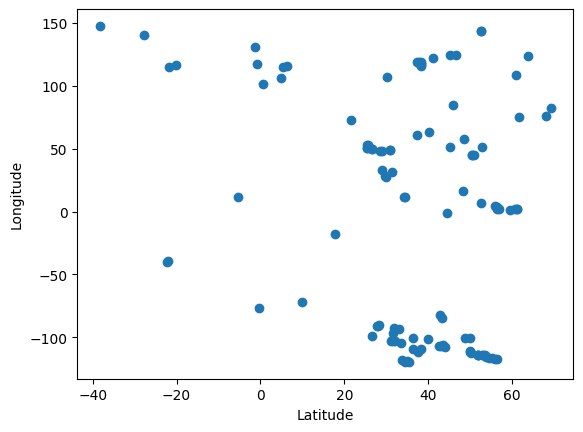

In [ ]:
plt.scatter(df1['Latitude'],df1['Longitude'])

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()

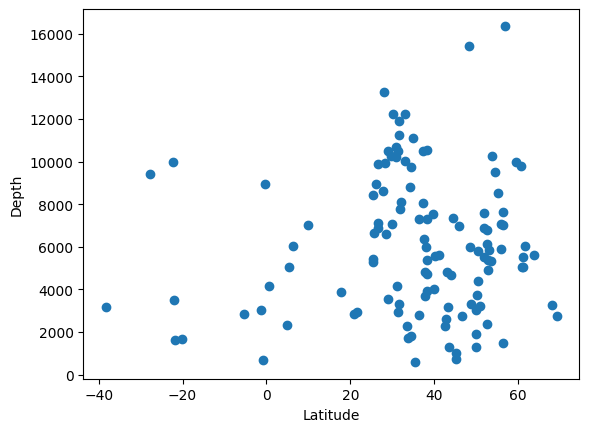

In [ ]:
plt.scatter(df1['Latitude'],df1['Depth'])

plt.xlabel('Latitude')
plt.ylabel('Depth')

plt.show()

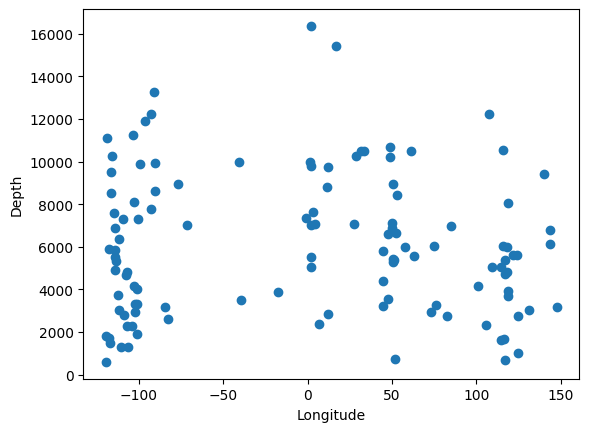

In [ ]:
plt.scatter(df1['Longitude'],df1['Depth'])

plt.xlabel('Longitude')
plt.ylabel('Depth')

plt.show()

In [ ]:
df2=pd.read_csv("train_oil.csv")

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="MyApp")


In [ ]:
 df1_new=pd.get_dummies(df1[['Country']], prefix=['Country'])


In [ ]:
float_columns= df2.select_dtypes(include=['float'])
obj_columns= df2.select_dtypes(include=['object'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
def drop_col(df):
    df=df.drop(["Field name","Hydrocarbon type","Reservoir unit","Country",
                "Region","Reservoir period","Basin name","Operator company","Tectonic regime","Lithology","Structural setting"
               ,"Reservoir status"],axis=1)
    return df

In [ ]:
df2=drop_col(df2)
df1=drop_col(df1)

In [ ]:
df2["Onshore/Offshore"]=le.fit_transform(df2["Onshore/Offshore"])


In [ ]:
corr_matrix = np.corrcoef(df2).round(decimals=2)
corr_matrix

array([[1.  , 0.95, 0.99, ..., 0.93, 0.86, 0.99],
       [0.95, 1.  , 0.92, ..., 0.99, 0.8 , 0.91],
       [0.99, 0.92, 1.  , ..., 0.88, 0.9 , 1.  ],
       ...,
       [0.93, 0.99, 0.88, ..., 1.  , 0.72, 0.88],
       [0.86, 0.8 , 0.9 , ..., 0.72, 1.  , 0.87],
       [0.99, 0.91, 1.  , ..., 0.88, 0.87, 1.  ]])

<Axes: >

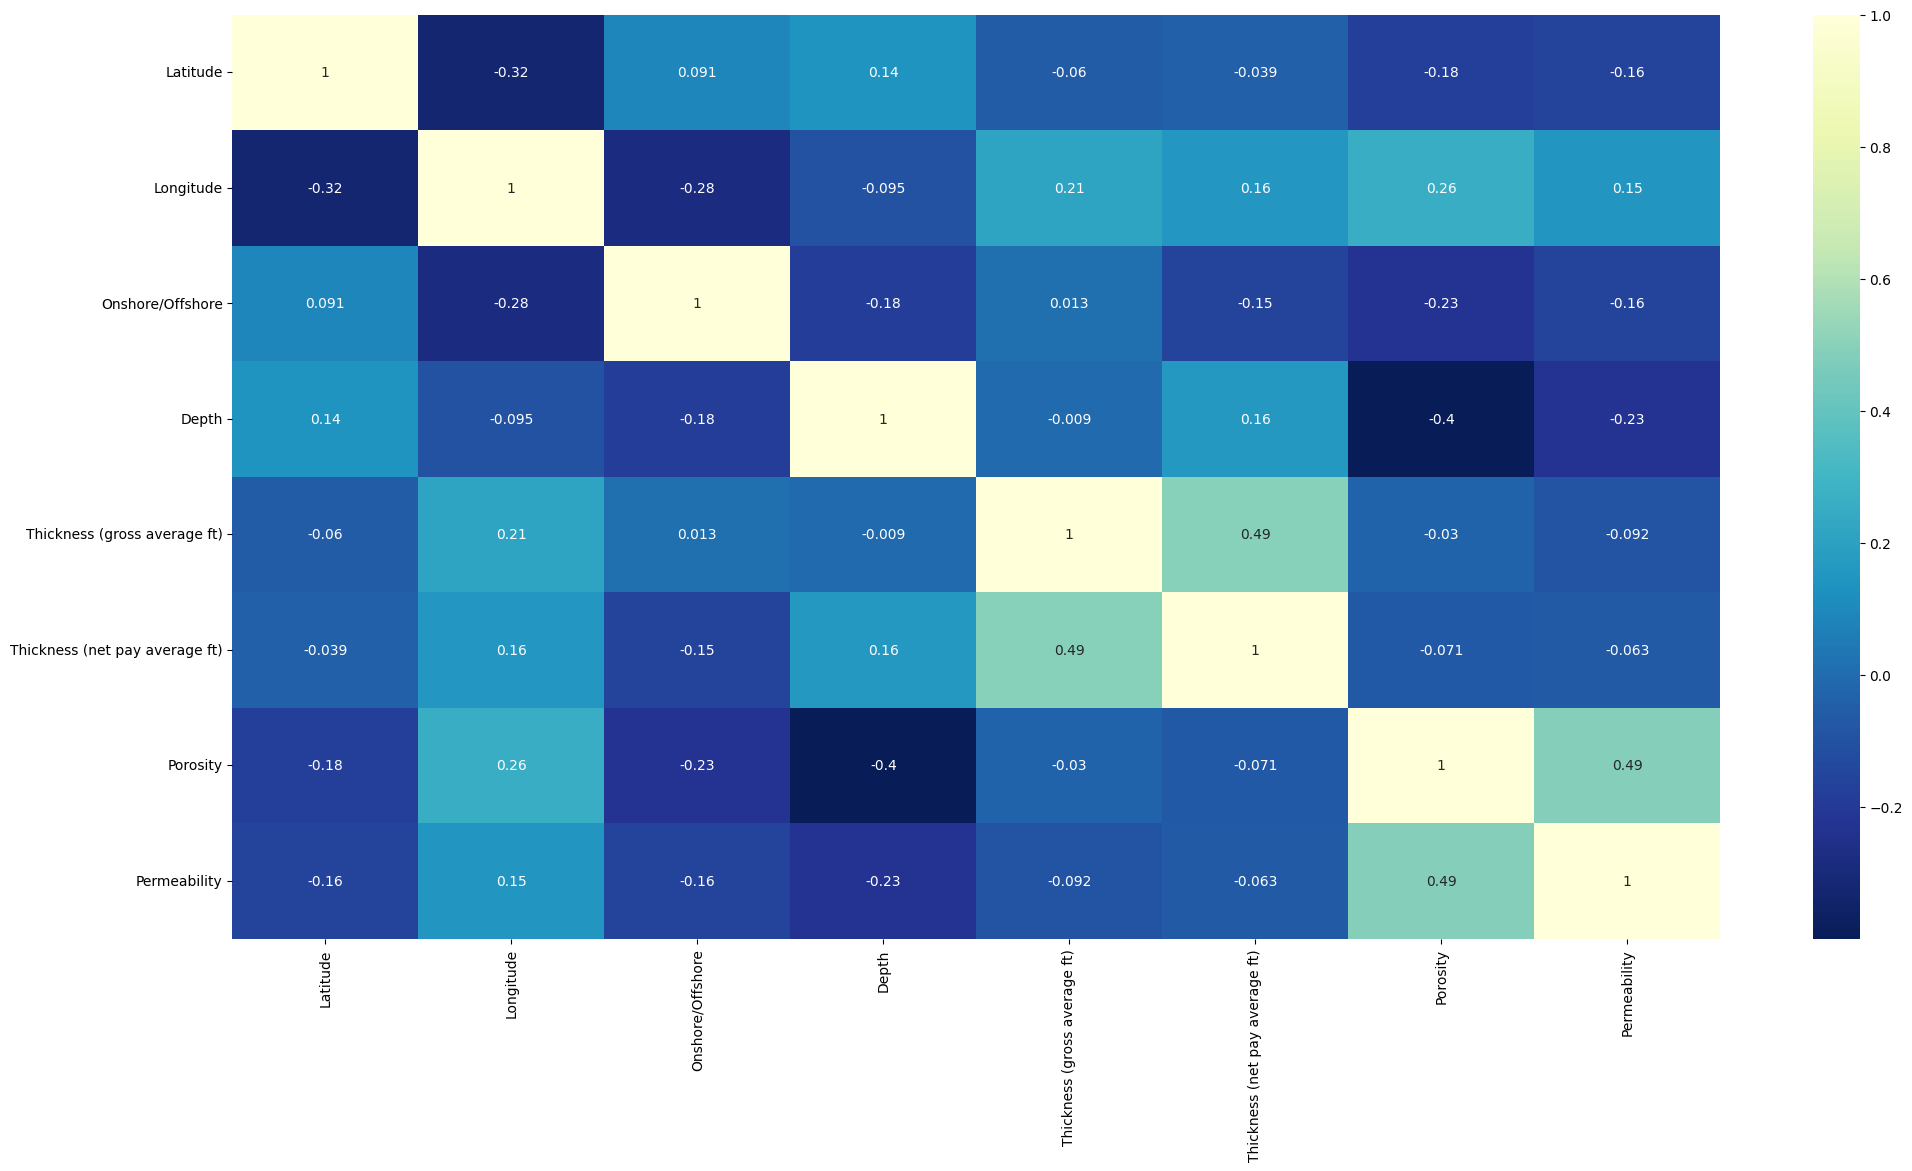

In [ ]:
plt.figure(figsize=(24,12))
sns.heatmap(df2.corr(),annot=True,cmap="YlGnBu_r")

In [ ]:
y=df2.pop("Onshore/Offshore")
X=df2

In [ ]:
df2["Latitude"]=df2["Latitude"].fillna(0)
df2["Longitude"]=df2["Longitude"].fillna(0)
# df2=df2.fillna(0)
# df1=df1.fillna(0)

In [ ]:
df1["Latitude"].isnull().sum() #13
df1["Longitude"].isnull().sum() #16


16

In [ ]:
from sklearn.preprocessing import RobustScaler,StandardScaler

rob=StandardScaler()
df1=rob.fit_transform(df1)
X=rob.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(max_depth=20, random_state=0)
# clf.fit(X_train, y_train)
# y_pred=clf.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('XGB', XGBClassifier(random_state=200,seed=100)))
# estimator.append(('dtc', DecisionTreeClassifier()))
# Voting Classifier with hard voting
clf = VotingClassifier(estimators = estimator, voting ='soft')
clf.fit(X_train, y_train)

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=200, ...))],
                 voting='soft')

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = list(y_test)
y_pred = y_pred
confusion_matrix(y_true, y_pred)

array([[22,  5,  0],
       [ 8, 65,  1],
       [ 0,  1,  0]])

In [ ]:
y_pred=clf.predict(df1)

In [ ]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
df=pd.DataFrame({"Onshore/Offshore":y_pred});df.index.name="index"

In [ ]:
df["Onshore/Offshore"]=df["Onshore/Offshore"].replace({0:"OFFSHORE",1:"ONSHORE",2:"ONSHORE/OFFSHORE"});df

,Onshore/Offshore
index,
0,ONSHORE
1,OFFSHORE
2,ONSHORE
3,OFFSHORE
4,ONSHORE
...,...
128,ONSHORE
129,ONSHORE
130,ONSHORE


In [ ]:
df.to_csv("sobhan_mohammadi_model.csv")